In [1]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
import numpy as np 
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import time 
from tqdm.notebook import tqdm
from itertools import combinations, product

In [2]:
from path_overlap import * 

# evolution via rewiring as a proxy to check that interfernece matches #independent-paths

In [28]:
num_iterations = 5
rw_it = 0.1
IG_dict = {}

num_dense, num_sparse = 5, 15
tot_units = num_dense + num_sparse
density = 1
range_num_layers = [2, 3, 4, 5, 6]#, 7, 8]
capacity = {}
independent_paths = {}

for nl in tqdm(range_num_layers):
    capacity[nl] = []
    independent_paths[nl] = []
    IG_dict[nl] = []
    for it in range(num_iterations):
        tMPG = multipartite_network(nl, num_dense, num_sparse, density)   
        tMPG = rewire_multipartite_network(tMPG, num_dense + num_sparse, rewire_prob=1, rewire_iters=50*nl)   
        IG, instant_paths = MP_interference_graph(tMPG);
        IG_dict[nl].append(IG)
#         capacity[nl].append(effective_capacity(tMPG, instant_paths, sizes = [2], num_samples=4000))
        independent_paths[nl].append(all_flows_MPG(tMPG, instant_paths))
        

No handles with labels found to put in legend.


Text(0, 0.5, '|MIS|')

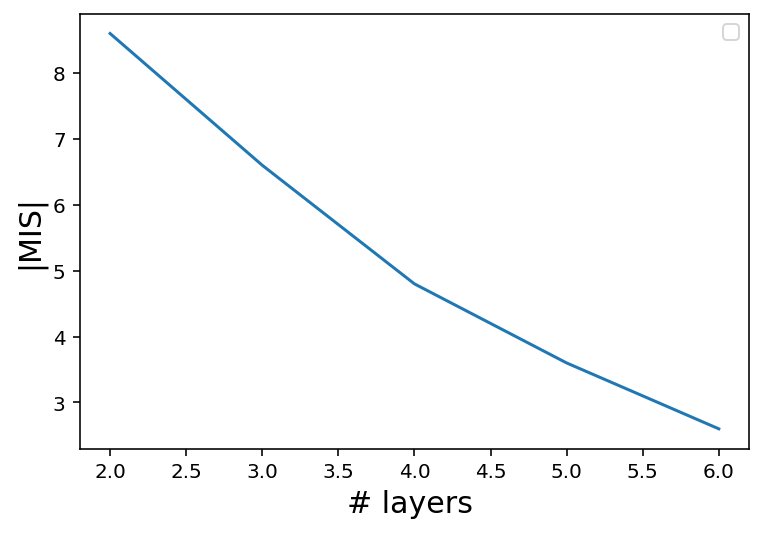

In [40]:
tot_interference = {}
for nl in range_num_layers:
    tot_interference[nl] = np.mean([len(nx.maximal_independent_set(nx.Graph(IG_dict[nl][x]))) for x in range(len(IG_dict[nl]))])

plt.plot(sorted(IG_dict.keys()), [tot_interference[x] for x in sorted(IG_dict.keys())])
plt.legend()
plt.xlabel('# layers ', fontsize=15)
plt.ylabel('|MIS|', fontsize=15)

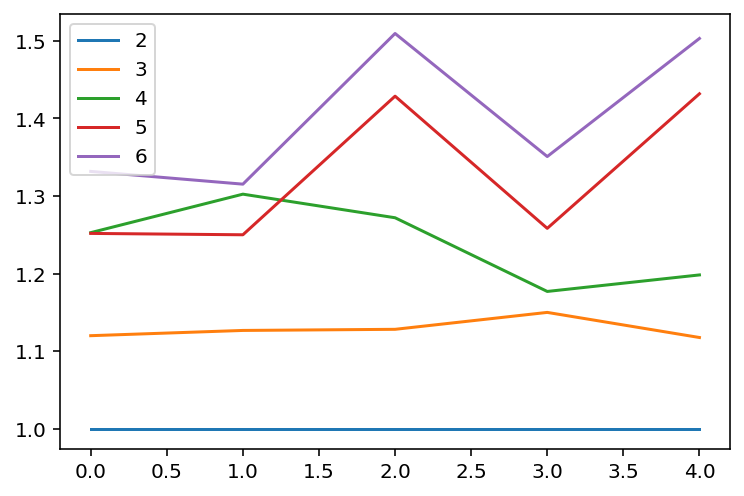

In [41]:
av_num_paths, err_num_paths = {}, {}
for nl in range_num_layers:
    av_num_paths[nl] = [np.mean(np.mean(list(independent_paths[nl][x].values()))) for x in range(0, num_iterations)]
    plt.plot(np.array(av_num_paths[nl]),  label = nl)
plt.legend()